# OBJETIVO: ESTUDAR O USO DE INTERNET E SEUS MEIOS NO NORDESTE

# Hugo Gonçalves Rocha - Ciência dos Dados
    
    
            Um grande indicador de desenvolvimento de um determinado local é o acesso que seus habitantes possuem à internet. No Brasil, a 11ª edição da pesquisa TIC Domicílios 2015 afirma que apenas 58% dos brasileiros possuem acesso à internet, e naturalmente, as regiões mais pobres estão mais sujeitas à falta do recurso. A região brasileira mais pobre em termos absolutos é o Nordeste. Embora apresente melhora ao longo dos anos, a região possuia, segundo dados do IPEA, metade da população considerada pobre do país ao fim da primeira década do século XXI.
            Meu objetivo no Projeto 1 de Ciência dos Dados é estudar como o uso da internet se difundiu/retraiu entre os anos de 2013 e 2015. Para isso, utilizarei os dados da PNAD no que diz respeito ao uso de internet em casa e os meios para tal (celular, computador, tablet). O objetivo principal é comparar a situação nos três anos e identificar a possível causa de melhora/piora.

In [52]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os

In [53]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())
dados = pd.read_csv('DOM2015.csv')

Esperamos trabalhar no diretório
C:\Users\hugon\Desktop\INSPER\2º semestre\Ciência dos Dados\Projeto 1


In [54]:
dados.UF = dados.UF.astype('category')
dados.ACESSO = dados.V02322.astype('category')
dados.SALARIO = dados.V4622.astype('category')
dados.COMP = dados.V02323.astype('category')
dados.CEL = dados.V02324.astype('category')
dados.REG = dados.V4105.astype('category')
dados.TAB = dados.V02325.astype('category')
#dados.T = dados.V0226.astype('category')

In [55]:
dados.UF.cat.categories = (['Rondônia','Acre','Amazonas','Roraima','Pará','Amapá','Tocantins','Maranhão','Piauí','Ceará','Rio Grande do Norte','Paraíba','Pernambuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espírito Santo','Rio de Janeiro','São Paulo','Paraná','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal'])
dados.ACESSO.cat.categories = (['Possui','Não possui'])
dados.SALARIO.cat.categories = (['0','Até 0,25','0,25 - 0,5','0,5 - 1','1 - 2','2 - 3','3 - 5','+5','Sem declaração'])
dados.COMP.cat.categories = (['Sim','Não'])
dados.CEL.cat.categories = (['Sim','Não'])
dados.REG.cat.categories = (['URBANA - Cidade ou vila, área urbanizada', 'URBANA - Cidade ou vila, área não urbanizada','URBANA - área urbana isolada','RURAL - Aglomerado rural de extensão urbana','RURAL - Aglomerado rural, isolado, povoado','RURAL - Aglomerado rural, isolado, núcleo','RURAL - Aglomerado rural, isolado, outros aglomerados','RURAL - Zona rural exclusive aglomerado rural '])
dados.TAB.cat.categories = (['Sim','Não'])
#dados.T.cat.categories = (['Sim','Não'])


d = pd.concat([dados.UF, dados.REG, dados.SALARIO, dados.ACESSO, dados.COMP, dados.CEL, dados.TAB], axis = 1)
d.columns = ['ESTADO','ZONA','RENDA PER CAPITA (em salários mínimos (R$))','ACESSO À INTERNET EM CASA','ACESSO À INTERNET POR MICROCOMPUTADOR', 'ACESSO À INTERNET POR CELULAR', 'ACESSO À INTERNET POR TABLET' ]
nordeste = d[(d['ESTADO'] == 'Maranhão') | (d['ESTADO'] == 'Piauí')| (d['ESTADO'] == 'Ceará')| (d['ESTADO'] == 'Rio Grande do Norte')| (d['ESTADO'] == 'Paraíba')| (d['ESTADO'] == 'Pernambuco')| (d['ESTADO'] == 'Alagoas')| (d['ESTADO'] == 'Sergipe')| (d['ESTADO'] == 'Bahia')]
#data[(data['ZONA'] == 'RURAL - Aglomerado rural de extensão urbana')]
nordeste

,ESTADO,ZONA,RENDA PER CAPITA (em salários mínimos (R$)),ACESSO À INTERNET EM CASA,ACESSO À INTERNET POR MICROCOMPUTADOR,ACESSO À INTERNET POR CELULAR,ACESSO À INTERNET POR TABLET
21442,Maranhão,"URBANA - Cidade ou vila, área urbanizada",1 - 2,Não possui,NaN,NaN,NaN
21443,Maranhão,"URBANA - Cidade ou vila, área urbanizada","0,25 - 0,5",Não possui,NaN,NaN,NaN
21444,Maranhão,"URBANA - Cidade ou vila, área urbanizada","0,5 - 1",Possui,Não,Sim,Não
21445,Maranhão,"URBANA - Cidade ou vila, área urbanizada",NaN,NaN,NaN,NaN,NaN
21446,Maranhão,"URBANA - Cidade ou vila, área urbanizada",NaN,NaN,NaN,NaN,NaN
21447,Maranhão,"URBANA - Cidade ou vila, área urbanizada","Até 0,25",Não possui,NaN,NaN,NaN
21448,Maranhão,"URBANA - Cidade ou vila, área urbanizada","Até 0,25",Possui,Não,Sim,Não
21449,Maranhão,"URBANA - Cidade ou vila, área urbanizada","0,25 - 0,5",Não possui,NaN,NaN,NaN
21450,Maranhão,"URBANA - Cidade ou vila, área urbanizada","Até 0,25",Não possui,NaN,NaN,NaN
21451,Maranhão,"URBANA - Cidade ou vila, área urbanizada",2 - 3,Possui,Não,Sim,Não


In [56]:
print('Frequências absolutas por ZONA:')
ut1 = nordeste['ZONA'].value_counts(sort=False).reindex(['URBANA - cidade ou vila urbanizada', 'URBANA - cidade ou vila não-urbanizada','URBANA - área urbana isolada','RURAL - Aglomerado rural de extensão urbana','RURAL - Aglomerado rural, isolado, povoado','RURAL - Aglomerado rural, isolado, núcleo','RURAL - Aglomerado rural, isolado, outros aglomerados','RURAL - Zona rural exclusive aglomerado rural '])
print(ut1,'\n')


Frequências absolutas por ZONA:
URBANA - cidade ou vila urbanizada                          NaN
URBANA - cidade ou vila não-urbanizada                      NaN
URBANA - área urbana isolada                              482.0
RURAL - Aglomerado rural de extensão urbana               192.0
RURAL - Aglomerado rural, isolado, povoado               2014.0
RURAL - Aglomerado rural, isolado, núcleo                  46.0
RURAL - Aglomerado rural, isolado, outros aglomerados     133.0
RURAL - Zona rural exclusive aglomerado rural            6781.0
Name: ZONA, dtype: float64 



In [57]:
#lista = [33322,464,486,192,2014,46,133,6781]
#lista2 = []
#total = 43434

#def porcentagem(n):
 #   total = 43434
  #  y = (n/total)*100
   # return(y)

#for i in lista:
 #   x = porcentagem(i)
  #  lista2.append(x)


#lista2, sum(lista2)

In [58]:
#TABELA DE ACESSO À INTERNET NO NORDESTE (EM Nº DE DOMÍCILIOS EM CADA ESTADO)
ct=pd.crosstab(nordeste['ESTADO'], nordeste['ACESSO À INTERNET EM CASA'], margins=True, rownames=['ESTADO'], colnames=['ACESSO À INTERNET EM CASA'])
ct=ct.loc[['Maranhão','Piauí','Ceará','Rio Grande do Norte','Paraíba','Pernambuco','Alagoas','Sergipe','Bahia']]
ct

ACESSO À INTERNET EM CASA,Possui,Não possui,All
ESTADO,,,
Maranhão,863,1742,2605
Piauí,627,1074,1701
Ceará,2561,3055,5616
Rio Grande do Norte,860,678,1538
Paraíba,1046,901,1947
Pernambuco,3683,3159,6842
Alagoas,668,1002,1670
Sergipe,1100,816,1916
Bahia,4636,4104,8740


In [59]:
#TABELA DE ACESSO À INTERNET NO NORDESTE (EM % POR ESTADO)

ct1=pd.crosstab(nordeste['ACESSO À INTERNET EM CASA'], nordeste['ESTADO'], margins=True, rownames=['ACESSO À INTERNET EM CASA'], colnames=['ESTADOS'], normalize=True)*100
#ct1 = ct1[7:15]
ct1

ESTADOS,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,All
ACESSO À INTERNET EM CASA,,,,,,,,,,
Possui,2.649271,1.924789,7.861857,2.640061,3.211051,11.306216,2.050652,3.376823,14.231773,49.252494
Não possui,5.347659,3.297007,9.378358,2.081351,2.765925,9.697621,3.075979,2.504988,12.598619,50.747506
All,7.996930,5.221796,17.240215,4.721412,5.976976,21.003837,5.126631,5.881811,26.830391,100.000000


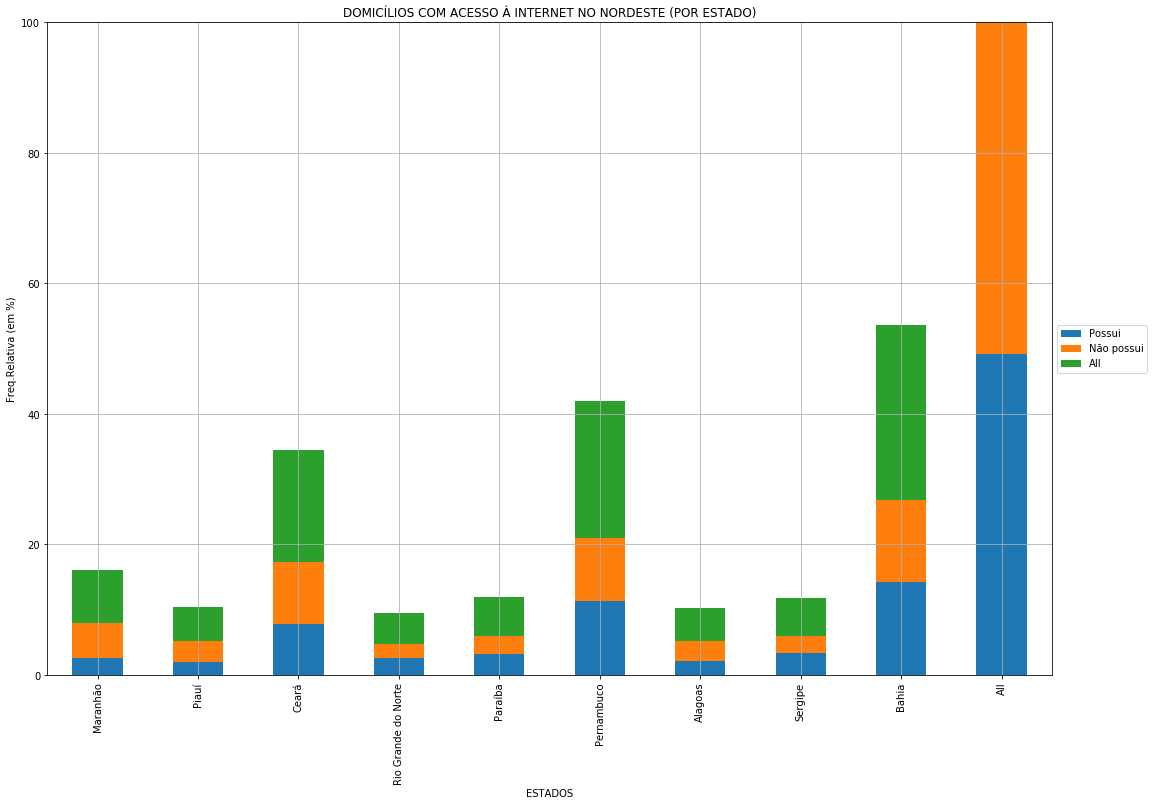

In [60]:
plot = ct1.T.plot(kind='bar', stacked=True,title='DOMICÍLIOS COM ACESSO À INTERNET NO NORDESTE (POR ESTADO)')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em %)')
plt.grid()

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 3, box.height*3])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [61]:
ct2=pd.crosstab(nordeste['RENDA PER CAPITA (em salários mínimos (R$))'], nordeste['ESTADO'], margins=True, rownames=['RENDA PER CAPITA ()'], colnames=[''], normalize=True)*100
#ct3=ct2.loc[['Maranhão','Piauí','Ceará','Rio Grande do Norte','Paraíba','Pernambuco','Alagoas','Sergipe','Bahia']]
ct2

,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,All
RENDA PER CAPITA (),,,,,,,,,,
0,0.082761,0.036783,0.003065,0.012261,0.033718,0.015326,0.000000,0.067435,0.055174,0.306523
"Até 0,25",1.716528,0.864394,2.403139,0.591589,0.809220,2.381682,0.879720,0.793894,3.062163,13.502330
"0,25 - 0,5",1.921898,1.183178,3.797818,1.026851,1.318048,4.717386,1.351766,1.345635,5.535802,22.198382
"0,5 - 1",2.446052,1.734919,5.995586,1.563266,2.007724,7.485287,1.768637,1.980137,9.293771,34.275380
1 - 2,1.140265,0.971677,3.252207,0.937960,1.085091,3.892840,0.695807,1.131069,5.569519,18.676435
2 - 3,0.180848,0.199240,0.655959,0.251349,0.245218,0.885851,0.186979,0.220696,1.324179,4.150319
3 - 5,0.162457,0.104218,0.423001,0.199240,0.226827,0.781633,0.107283,0.180848,1.005395,3.190902
+5,0.150196,0.095022,0.331045,0.104218,0.177783,0.637567,0.064370,0.085826,0.747916,2.393943
Sem declaração,0.190044,0.027587,0.383154,0.042913,0.067435,0.177783,0.076631,0.073565,0.266675,1.305787


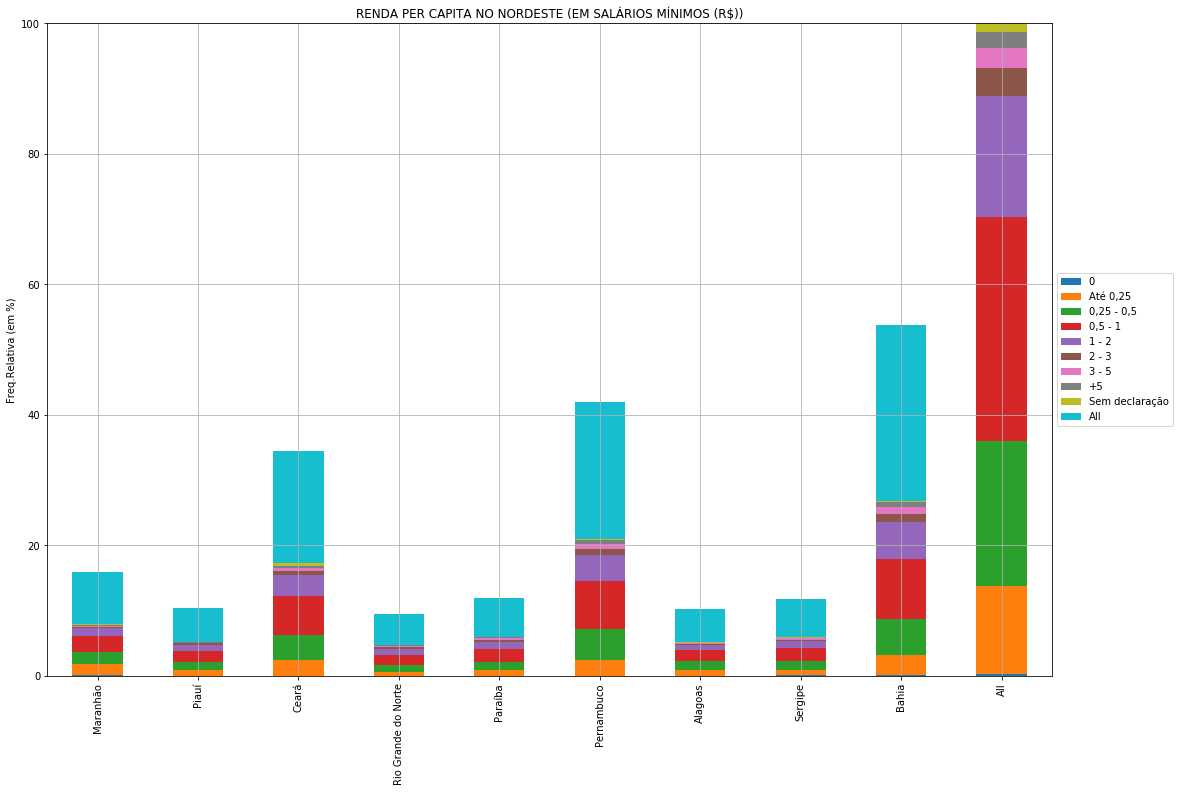

In [62]:
plot = ct2.T.plot(kind='bar', stacked=True,title='RENDA PER CAPITA NO NORDESTE (EM SALÁRIOS MÍNIMOS (R$))')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em %)')
plt.grid()

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 3, box.height*3])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [69]:
nordeste.to_csv('Projeto1_HugoGR.csv', index=False, encoding='utf-8')